In [42]:
import numpy as np
import pandas as pd
from math import log2
import plotly.plotly as py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import scipy.stats as ss
from scipy import stats

# IRI Histgram of T Cell 

In [2]:
# Read IRI Data File
def read_table(filename):
    data = pd.read_table(filename)
    data = data[['gene_id','gene_CIR_read_count','gene_CER_read_count',
                           'gene_CIR_RPKM','gene_CER_RPKM','gene_IRI']]

    data = data.sort_values('gene_IRI',ascending= False).set_index('gene_id').replace([np.inf, -np.inf], np.nan).dropna()
    data = data[data.gene_IRI != 0]
    data = data[data.gene_IRI < 1]
    data = data[data.gene_CER_RPKM > 1]
    data = pd.DataFrame(data)
    return (data)

def read_csv(filename):
    data = pd.read_csv(filename,delimiter=',')
    data = data[['gene_id','gene_CIR_read_count','gene_CER_read_count',
                           'gene_CIR_RPKM','gene_CER_RPKM','gene_IRI']]

    data = data.sort_values('gene_IRI',ascending= False).set_index('gene_id').replace([np.inf, -np.inf], np.nan).dropna()
    data = data[data.gene_IRI != 0]
    data = data[data.gene_IRI < 1]
    data = data[data.gene_CER_RPKM > 1]
    data = pd.DataFrame(data)
    return (data)

     
L140_IRI_sorted = read_csv('L140_sorted.quant.IRI.genes.csv')
L149_IRI_sorted = read_csv('L149_sorted.quant.IRI.genes.csv')
L062_IRI_sorted = read_csv('L062_sorted.quant.IRI.genes.csv')
N048_IRI_sorted = read_csv('N048_sorted.quant.IRI.genes.csv')
N068_IRI_sorted = read_table('N068_sorted.quant.IRI.genes.csv')
N090_IRI_sorted = read_csv('N090_sorted.quant.IRI.genes.csv')
N098_IRI_sorted = read_table('N098_sorted.quant.IRI.genes.csv')
L005_IRI_sorted = read_table('L005_sorted.quant.IRI.genes.csv')
L027_IRI_sorted = read_table('L027_sorted.quant.IRI.genes.csv')
L031_IRI_sorted = read_table('L031_sorted.quant.IRI.genes.csv')
L072_IRI_sorted = read_csv('L072_sorted.quant.IRI.genes.csv')
L074_IRI_sorted = read_table('L074_sorted.quant.IRI.genes.csv')
L078_IRI_sorted = read_table('L078_sorted.quant.IRI.genes.csv')
L102_IRI_sorted = read_table('L102_sorted.quant.IRI.genes.csv')
L115_IRI_sorted = read_csv('L115_sorted.quant.IRI.genes.csv')
L133_IRI_sorted = read_table('L133_sorted.quant.IRI.genes.csv')
L137_IRI_sorted = read_table('L137_sorted.quant.IRI.genes.csv')

In [3]:
L140_IRI_sorted.head(2)

,gene_CIR_read_count,gene_CER_read_count,gene_CIR_RPKM,gene_CER_RPKM,gene_IRI
gene_id,,,,,
TSSK4,422.377328,459.622672,4.598653,4.667457,0.985259
TREX2,83.221642,216.778358,2.130082,2.268034,0.939175


### IRI Histogram

In [4]:
# get datalist for each samples
l062_iri = np.log2(L062_IRI_sorted['gene_IRI'].values)
l140_iri = np.log2(L140_IRI_sorted['gene_IRI'].values)
l149_iri = np.log2(L149_IRI_sorted['gene_IRI'].values)

n048_iri = np.log2(N048_IRI_sorted['gene_IRI'].values)
n068_iri = np.log2(N068_IRI_sorted['gene_IRI'].values)
n090_iri = np.log2(N090_IRI_sorted['gene_IRI'].values)
n098_iri = np.log2(N098_IRI_sorted['gene_IRI'].values)

l072_iri = np.log2(L062_IRI_sorted['gene_IRI'].values)
l137_iri = np.log2(L137_IRI_sorted['gene_IRI'].values)

l074_iri = np.log2(L074_IRI_sorted['gene_IRI'].values)
l078_iri = np.log2(L078_IRI_sorted['gene_IRI'].values)
l005_iri = np.log2(L005_IRI_sorted['gene_IRI'].values)
l031_iri = np.log2(L031_IRI_sorted['gene_IRI'].values)
l133_iri = np.log2(L133_IRI_sorted['gene_IRI'].values)
l027_iri = np.log2(L027_IRI_sorted['gene_IRI'].values)
l102_iri = np.log2(L102_IRI_sorted['gene_IRI'].values)
l115_iri = np.log2(L115_IRI_sorted['gene_IRI'].values)

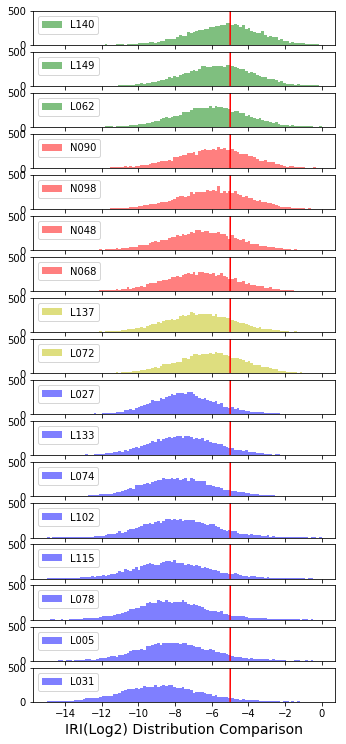

In [5]:
#define data list and plot the histogram
data_iri = [l140_iri, l149_iri, l062_iri, n090_iri, n098_iri, n048_iri, n068_iri,
       l137_iri, l072_iri, l027_iri, l133_iri, l074_iri, l102_iri, l115_iri, l078_iri, l005_iri, l031_iri,]
data_name = [ 'L140', 'L149','L062','N090', 'N098','N048', 'N068', 'L137','L072',
            'L027', 'L133', 'L074', 'L102', 'L115' , 'L078', 'L005', 'L031']
colors = ['g','g','g','r','r','r','r','y','y','b','b','b','b','b','b','b','b']

num_bin = 100
alpha_trans = 0.5
xmin = -15
xmax = 0

plt.figure()
plt.title('IRI Distribution')
for i in range(17):
    plt.subplot(17, 1, i+1)
    plt.hist(data_iri[i], num_bin, range=[xmin, xmax], alpha = alpha_trans, 
             label = data_name[i], facecolor=colors[i])
    plt.plot([-5.0,-4.99],[-100, 500], '-r' )
    #plt.plot([-6.0,-5.99],[-100, 500], '-g' )
    #plt.plot([-7.0,-6.99],[-100, 500], '-b' )
    #plt.plot([-8.0,-7.99],[-100, 500], '-p' )
    plt.legend(loc = 2)
    plt.ylim(0,500)
    
plt.xlabel('IRI(Log2) Distribution Comparison',fontsize = 14)

plt.subplots_adjust(top = 3.2, bottom = 0.8, left = 0.1, right = 0.8)
#plt.savefig("IRI_Distribution_All.png", bbox_inches='tight', dpi=400)
plt.show()    

### IRI fold change VS CER fold change

In [6]:
#define function to get datafram based on dataliset and column_name
def get_dataframe(datalist, name_list, column_name):
    gene_list = []
    data_list = []
    #get overlap gene list of all 16 samples
    for data in datalist:
        gene = data.index.tolist()
        gene_list.append(gene)
    gene_list = set.intersection(*map(set,gene_list))
    
    for data in datalist:
        data = data.loc[gene_list]
        data = data[column_name].values.tolist()
        data_list.append(data)
        
    dataframe = pd.DataFrame(data_list).transpose()
    dataframe.columns = name_list 
    dataframe.index = gene_list
    return(dataframe)

In [7]:
# get IRI and CER of differnect groups

Data_list = [L140_IRI_sorted,L149_IRI_sorted,L062_IRI_sorted,N048_IRI_sorted,
             N068_IRI_sorted,N090_IRI_sorted,N098_IRI_sorted,L005_IRI_sorted,
             L027_IRI_sorted,L031_IRI_sorted,L072_IRI_sorted,L074_IRI_sorted,
             L078_IRI_sorted,L102_IRI_sorted,L115_IRI_sorted,L133_IRI_sorted,
            L137_IRI_sorted]
Data_list_AL = [L140_IRI_sorted,L149_IRI_sorted,L062_IRI_sorted,L005_IRI_sorted,
             L027_IRI_sorted,L031_IRI_sorted,L072_IRI_sorted,L074_IRI_sorted,
             L078_IRI_sorted,L102_IRI_sorted,L115_IRI_sorted,L133_IRI_sorted,
            L137_IRI_sorted]
Data_list_4N = [N048_IRI_sorted,N068_IRI_sorted,N090_IRI_sorted,N098_IRI_sorted]


Name_list = ['L140','L149','L062','N048','N068','N090','N098','L005','L027','L031','L072',
             'L074','L078','L102','L115','L133','L137']
Name_list_AL = ['L140','L149','L062','L005','L027','L031','L072',
             'L074','L078','L102','L115','L133','L137']
Name_list_4N = ['N048','N068','N090','N098']

In [8]:
#get gene list for oevrlap genes
data_name = [ 'L140', 'L149','L062','N090', 'N098','N048', 'N068', 'L137','L072',
            'L027', 'L133', 'L074', 'L102', 'L115' , 'L078', 'L005', 'L031']

Data_IRI = get_dataframe(Data_list,Name_list,'gene_IRI')
IRI_Gene_List = Data_IRI.index.values.tolist()

In [48]:
# get dataset
Data_CER_4N = get_dataframe(Data_list_4N, Name_list_4N,'gene_CER_RPKM').loc[IRI_Gene_List]
Data_CIR_4N = get_dataframe(Data_list_4N, Name_list_4N,'gene_CIR_RPKM').loc[IRI_Gene_List]
Data_IRI_4N = get_dataframe(Data_list_4N, Name_list_4N,'gene_IRI').loc[IRI_Gene_List]

Data_CER_AL = get_dataframe(Data_list_AL, Name_list_AL,'gene_CER_RPKM').loc[IRI_Gene_List]
Data_CIR_AL = get_dataframe(Data_list_AL, Name_list_AL,'gene_CIR_RPKM').loc[IRI_Gene_List]
Data_IRI_AL = get_dataframe(Data_list_AL, Name_list_AL,'gene_IRI').loc[IRI_Gene_List]

Data_CER_4N['avg'] = np.mean(Data_CER_4N[Name_list_4N], axis=1)
Data_CIR_4N['avg'] = np.mean(Data_CIR_4N[Name_list_4N], axis=1)
Data_IRI_4N['avg'] = np.mean(Data_IRI_4N[Name_list_4N], axis=1)

Data_CER_AL['avg'] = np.mean(Data_CER_AL[Name_list_AL], axis=1)
Data_CIR_AL['avg'] = np.mean(Data_CIR_AL[Name_list_AL], axis=1)
Data_IRI_AL['avg'] = np.mean(Data_IRI_AL[Name_list_AL], axis=1)

Data_CER_4N['std'] = np.mean(Data_CER_4N[Name_list_4N], axis=1)
Data_CIR_4N['std'] = np.mean(Data_CIR_4N[Name_list_4N], axis=1)
Data_IRI_4N['std'] = np.mean(Data_IRI_4N[Name_list_4N], axis=1)

Data_CER_AL['std'] = np.mean(Data_CER_AL[Name_list_AL], axis=1)
Data_CIR_AL['std'] = np.mean(Data_CIR_AL[Name_list_AL], axis=1)
Data_IRI_AL['std'] = np.mean(Data_IRI_AL[Name_list_AL], axis=1)

NLL Pearson correlation coefficient: -0.3366


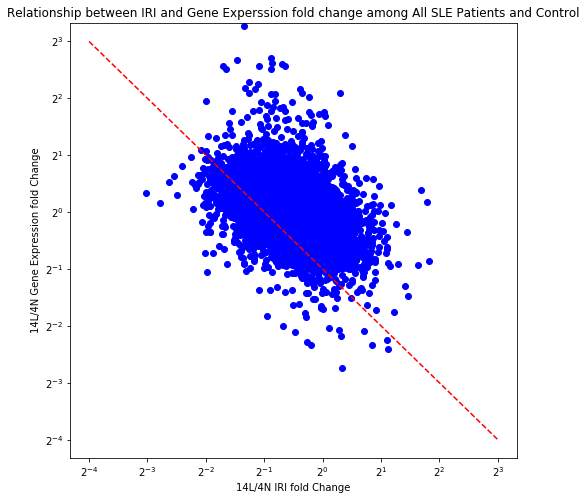

In [49]:
# get the plot reflecting IRI fold change and GE folod change
# AL vs 4N, IRI/CER
x = (Data_IRI_AL['avg']/Data_IRI_4N['avg'])
y = (Data_CER_AL['avg']/Data_CER_4N['avg'])
fig = plt.figure(figsize=(8,8))

plt.title("Relationship between IRI and Gene Experssion fold change among All SLE Patients and Control")
plt.scatter(x,y, marker = 'o', facecolor='b')
plt.plot([0.0625,8],[8,0.0625], '--r' )
plt.yscale('log',basey = 2)
plt.xscale('log',basex = 2)
plt.xlim(0.05, 10)
plt.ylim(0.05, 10)
plt.xlabel("14L/4N IRI fold Change")
plt.ylabel("14L/4N Gene Expression fold Change")
plt.savefig("IRI_CER_fold_Change_AL_4N.png", bbox_inches='tight', dpi=400)

NLL_PC = ss.pearsonr(x,y)
print('NLL Pearson correlation coefficient:',round(NLL_PC[0],4))

plt.show()

### IRI fold change box plot

In [50]:
# Build IRI fold change and Gene expression gold change dataframe
x = np.log2((Data_IRI_AL['avg']/Data_IRI_4N['avg']))
y = np.log2((Data_CER_AL['avg']/Data_CER_4N['avg']))

IRI_CER_Fold_Change = pd.DataFrame({'IRI_fold_change':x,
             'CER_fold_change':y})
IRI_CER_Fold_Change = IRI_CER_Fold_Change.sort_values('IRI_fold_change')
IRI_CER_Fold_Change.head(3)

,IRI_fold_change,CER_fold_change
ATP1B3,-3.021577,0.332030
CD7,-2.788192,0.161289
SORD,-2.625102,0.524326


In [51]:
#get data to plot the box plto
IRI_CER_Fold_Change_10 = np.array_split(IRI_CER_Fold_Change, 10)
IRI_Mean = []
CER_List = []
for chunk in IRI_CER_Fold_Change_10:
    IRI_mean = round(np.mean(chunk['IRI_fold_change']),2)
    IRI_Mean.append(IRI_mean)
    
    CER_list = chunk['CER_fold_change'].values.tolist()
    CER_List.append(CER_list)
IRI_Mean    

[-1.49, -1.12, -0.93, -0.78, -0.65, -0.52, -0.38, -0.22, -0.03, 0.37]

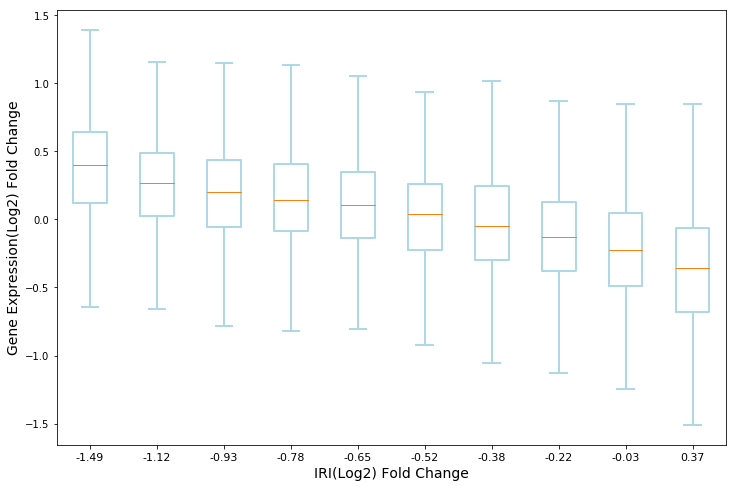

In [13]:
# plot box plot
fig = plt.figure(1, figsize=(12, 8))
ax = fig.add_subplot(111)

bp = ax.boxplot(CER_List, showfliers=False)
for whisker in bp['whiskers']:
    whisker.set(color='lightblue', linewidth=2)
for box in bp['boxes']:
    box.set( color='lightblue', linewidth=2) #change outline color
    #box.set( facecolor = 'lightblue')# change fill color
for cap in bp['caps']:
    cap.set(color='lightblue', linewidth=2)#line color 
for flier in bp['fliers']:
    flier.set(marker='o', color='#bff1bf', alpha=0.5)# outlier color

ax.set_xticklabels(IRI_Mean, fontsize = 11)

plt.xlabel("IRI(Log2) Fold Change", fontsize = 14)
plt.ylabel("Gene Expression(Log2) Fold Change",fontsize = 14)

plt.show()
#fig.savefig('IRI_folc_change_box.png', bbox_inches='tight', dpi = 400)

### example of deseased IR level and increased GE

In [52]:
# Setup a plot such that only the bottom spine is shown
def setup(ax,ylim):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    #ax.spines['left'].set_color('none')
    ax.xaxis.set_major_locator(ticker.NullLocator())
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, ylim)
    ax.patch.set_alpha(0.0)



In [53]:
# define function plot significance annotation between two bars
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.5
        # ** is p < 0.05
        # *** is p < 0.005
        # etc.
        text = ''
        p = .5

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

In [54]:
#Calculate p-value of t-test
ttest_id = stats.ttest_ind(Data_CER_4N.loc['CLIC3'].values.tolist(),
                           Data_CER_AL.loc['CLIC3'].values.tolist(),equal_var = False) 
ttest_id


Ttest_indResult(statistic=-6.0751492523467405, pvalue=2.3938584884208703e-05)

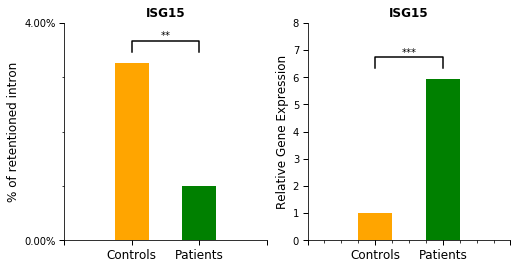

In [60]:
fig = plt.figure(figsize=(8, 4))
#ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
#ax = fig.add_subplot(1, 1, 1)
gs = GridSpec(1, 2)

ax = plt.subplot(gs[0,0])
setup(ax,0.04)

x = np.arange(4)
bars = [0,Data_IRI_4N['avg'].loc['ISG15'],Data_IRI_AL['avg'].loc['ISG15'],0]
#error = [0,Data_IRI_4N['std'].loc['ISG15'],Data_IRI_AL['std'].loc['ISG15'],0]
#ttest_id = stats.ttest_ind(Data_IRI_4N['avg'].loc['ISG15'],Data_IRI_AL['avg'].loc['ISG15'])    
#P-value = 0.015887
#plt.bar(x, bars, yerr=error, align='center',capsize=8,
        #ecolor='black',color=['white','orange', 'green','white'],width=0.5)
plt.bar(x, bars,color=['white','orange', 'green','white'],width=0.5)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.04))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title('ISG15', fontweight = 'bold')
barplot_annotate_brackets(1, 2, 0.015, x, bars)
plt.ylabel('% of retentioned intron',fontsize = 12)
plt.xticks(x, ('','Controls', 'Patients',''),fontsize = 12)


ax = plt.subplot(gs[0,1])
setup(ax,8)

x = np.arange(4)
bars = [0,Data_CER_4N['avg'].loc['ISG15']/Data_CER_4N['avg'].loc['ISG15'],Data_CER_AL['avg'].loc['ISG15']/Data_CER_4N['avg'].loc['ISG15'],0]
#error = [0,Data_CER_4N['std'].loc['ISG15']/Data_CER_4N['avg'].loc['ISG15'],Data_CER_AL['std'].loc['ISG15']/Data_CER_4N['avg'].loc['ISG15'],0]
#P-value = 0.00055
#plt.bar(x, bars, yerr=error, align='center',capsize=8,
        #ecolor='black',color=['white','orange', 'green','white'],width=0.5)
plt.bar(x, bars, color=['white','orange', 'green','white'],width=0.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.title('ISG15', fontweight = 'bold')
barplot_annotate_brackets(1, 2, 0.00055, x, bars)
plt.ylabel('Relative Gene Expression',fontsize = 12)
plt.xticks(x, ('','Controls', 'Patients',''),fontsize = 12)

#fig.savefig('IRI_CER_ISG15.png', bbox_inches='tight', dpi = 400)

plt.show()




# IRI histogram of Whole Blood Samples

In [ ]:
# read whole blood data

def read_file(filename):
    data = pd.read_table(filename)
    data = data[['gene_id','gene_CIR_read_count','gene_CER_read_count',
                           'gene_CIR_RPKM','gene_CER_RPKM','gene_IRI']]
    data = data.sort_values('gene_CIR_RPKM',ascending= False).set_index('gene_id').replace([np.inf, -np.inf], np.nan).dropna()
    data = data[data.gene_IRI != 0]
    data = data[data.gene_IRI < 1]
    data = data[data.gene_CER_RPKM > 1]
    data = pd.DataFrame(data)
    return (data)
     
C61102_sorted = read_file('C61102_sorted.quant.IRI.genes.csv')
C61929_sorted = read_file('C61929_sorted.quant.IRI.genes.csv')
C63851_sorted = read_file('C63851_sorted.quant.IRI.genes.csv')
C66947_sorted = read_file('C66947_sorted.quant.IRI.genes.csv')
C67125_sorted = read_file('C67125_sorted.quant.IRI.genes.csv')
C67345_sorted = read_file('C67345_sorted.quant.IRI.genes.csv')
C71149_sorted = read_file('C71149_sorted.quant.IRI.genes.csv')
C71175_sorted = read_file('C71175_sorted.quant.IRI.genes.csv')
C71460_sorted = read_file('C71460_sorted.quant.IRI.genes.csv')
C72516_sorted = read_file('C72516_sorted.quant.IRI.genes.csv')
C72569_sorted = read_file('C72569_sorted.quant.IRI.genes.csv')
C73816_sorted = read_file('C73816_sorted.quant.IRI.genes.csv')
C75734_sorted = read_file('C75734_sorted.quant.IRI.genes.csv')
C76082_sorted = read_file('C76082_sorted.quant.IRI.genes.csv')
C76124_sorted = read_file('C76124_sorted.quant.IRI.genes.csv')
C76797_sorted = read_file('C76797_sorted.quant.IRI.genes.csv')
C77460_sorted = read_file('C77460_sorted.quant.IRI.genes.csv')
C78371_sorted = read_file('C78371_sorted.quant.IRI.genes.csv')
C78460_sorted = read_file('C78460_sorted.quant.IRI.genes.csv')
C84040_sorted = read_file('C84040_sorted.quant.IRI.genes.csv')
C84731_sorted = read_file('C84731_sorted.quant.IRI.genes.csv')
C85644_sorted = read_file('C85644_sorted.quant.IRI.genes.csv')

SB08_sorted = read_file('SB08_sorted.quant.IRI.genes.csv')
SB09_sorted = read_file('SB09_sorted.quant.IRI.genes.csv')
SB18_sorted = read_file('SB18_sorted.quant.IRI.genes.csv')
SB27_sorted = read_file('SB27_sorted.quant.IRI.genes.csv')
SB42_sorted = read_file('SB42_sorted.quant.IRI.genes.csv')
SB48_sorted = read_file('SB48_sorted.quant.IRI.genes.csv')
SB67_sorted = read_file('SB67_sorted.quant.IRI.genes.csv')
SB71_sorted = read_file('SB71_sorted.quant.IRI.genes.csv')
SB72_sorted = read_file('SB72_sorted.quant.IRI.genes.csv')
SB83_sorted = read_file('SB83_sorted.quant.IRI.genes.csv')
SB84_sorted = read_file('SB84_sorted.quant.IRI.genes.csv')
SB87_sorted = read_file('SB87_sorted.quant.IRI.genes.csv')
SB89_sorted = read_file('SB89_sorted.quant.IRI.genes.csv')
SB100_sorted = read_file('SB100_sorted.quant.IRI.genes.csv')
SB101_sorted = read_file('SB101_sorted.quant.IRI.genes.csv')
SB103_sorted = read_file('SB103_sorted.quant.IRI.genes.csv')
SB104_sorted = read_file('SB104_sorted.quant.IRI.genes.csv')
SB105_sorted = read_file('SB105_sorted.quant.IRI.genes.csv')
SB106_sorted = read_file('SB106_sorted.quant.IRI.genes.csv')
SB107_sorted = read_file('SB107_sorted.quant.IRI.genes.csv')
SB108_sorted = read_file('SB108_sorted.quant.IRI.genes.csv')
SB109_sorted = read_file('SB109_sorted.quant.IRI.genes.csv')

SB100_sorted.shape

### IRI histogram 

In [ ]:
C61102_iri = np.log2(C61102_sorted['gene_IRI'].values)
C61929_iri = np.log2(C61929_sorted['gene_IRI'].values)
C63851_iri = np.log2(C63851_sorted['gene_IRI'].values)
C66947_iri = np.log2(C66947_sorted['gene_IRI'].values)
C67125_iri = np.log2(C67125_sorted['gene_IRI'].values)

C67345_iri = np.log2(C67345_sorted['gene_IRI'].values)
C71149_iri = np.log2(C71149_sorted['gene_IRI'].values)
C71175_iri = np.log2(C71175_sorted['gene_IRI'].values)

C71460_iri = np.log2(C71460_sorted['gene_IRI'].values)
C72516_iri = np.log2(C72516_sorted['gene_IRI'].values)
C72569_iri = np.log2(C72569_sorted['gene_IRI'].values)
C73816_iri = np.log2(C73816_sorted['gene_IRI'].values)
C75734_iri = np.log2(C75734_sorted['gene_IRI'].values)

C76082_iri = np.log2(C76082_sorted['gene_IRI'].values)
C76124_iri = np.log2(C76124_sorted['gene_IRI'].values)
C76797_iri = np.log2(C76797_sorted['gene_IRI'].values)
C77460_iri = np.log2(C77460_sorted['gene_IRI'].values)
C78371_iri = np.log2(C78371_sorted['gene_IRI'].values)

C78460_iri = np.log2(C78460_sorted['gene_IRI'].values)
C84040_iri = np.log2(C84040_sorted['gene_IRI'].values)
C84731_iri = np.log2(C84731_sorted['gene_IRI'].values)
C85644_iri = np.log2(C85644_sorted['gene_IRI'].values)

SB08_iri = np.log2(SB08_sorted['gene_IRI'].values)
SB09_iri = np.log2(SB09_sorted['gene_IRI'].values)
SB18_iri = np.log2(SB18_sorted['gene_IRI'].values)
SB27_iri = np.log2(SB27_sorted['gene_IRI'].values)

SB42_iri = np.log2(SB42_sorted['gene_IRI'].values)
SB48_iri = np.log2(SB48_sorted['gene_IRI'].values)
SB67_iri = np.log2(SB67_sorted['gene_IRI'].values)
SB71_iri = np.log2(SB71_sorted['gene_IRI'].values)
SB72_iri = np.log2(SB72_sorted['gene_IRI'].values)

SB83_iri = np.log2(SB83_sorted['gene_IRI'].values)
SB84_iri = np.log2(SB84_sorted['gene_IRI'].values)
SB87_iri = np.log2(SB87_sorted['gene_IRI'].values)
SB89_iri = np.log2(SB89_sorted['gene_IRI'].values)

SB100_iri = np.log2(SB100_sorted['gene_IRI'].values)
SB101_iri = np.log2(SB101_sorted['gene_IRI'].values)
SB103_iri = np.log2(SB103_sorted['gene_IRI'].values)
SB104_iri = np.log2(SB104_sorted['gene_IRI'].values)
SB105_iri = np.log2(SB105_sorted['gene_IRI'].values)

SB106_iri = np.log2(SB106_sorted['gene_IRI'].values)
SB107_iri = np.log2(SB107_sorted['gene_IRI'].values)
SB108_iri = np.log2(SB108_sorted['gene_IRI'].values)
SB109_iri = np.log2(SB109_sorted['gene_IRI'].values)

In [ ]:
data_iri = [C61102_iri, C61929_iri, C63851_iri, C66947_iri, C67125_iri, C67345_iri, 
            C71149_iri, C71175_iri, C71460_iri, C72516_iri, 
            C72569_iri, C73816_iri, C75734_iri, C76082_iri, C76124_iri, C76797_iri, 
            C77460_iri, C78371_iri, C78460_iri, C84040_iri, C84731_iri, C85644_iri]

data_name = ['C61102', 'C61929', 'C63851', 'C66947', 'C67125', 'C67345', 
            'C71149', 'C71175', 'C71460', 'C72516',
             'C72569',  'C73816', 'C75734', 'C76082', 'C76124', 'C76797', 
             'C77460',  'C78371', 'C78460', 'C84040', 'C84731', 'C85644']

num_bin = 100
alpha_trans = 0.5
xmin = -10
xmax = 0

plt.figure()
plt.title('IRI Distribution')
for i in range(22):
    plt.subplot(22, 1, i+1)
    plt.hist(data_iri[i], num_bin, range=[xmin, xmax], alpha = alpha_trans, 
             label = data_name[i], facecolor='g')
    plt.plot([-3,-2.99],[-100, 500], '-r' )
    plt.legend(loc = 2)
    plt.ylim(0,500)
    
plt.xlabel('Whole Blood Controls IRI(Log2)',fontsize = 14)

plt.subplots_adjust(top = 3.2, bottom = 0.8, left = 0.1, right = 0.8)
#plt.savefig("IRI_Distribution_All_C.png", bbox_inches='tight', dpi=400)
plt.show()    

In [ ]:
data_iri = [SB08_iri, SB09_iri, SB18_iri, SB27_iri, SB42_iri, SB48_iri, 
            SB67_iri, SB71_iri, SB72_iri, SB83_iri, SB84_iri, SB87_iri, 
             SB89_iri, SB100_iri, SB101_iri, SB103_iri, SB104_iri, 
            SB105_iri, SB106_iri, SB107_iri, SB108_iri, SB109_iri]

data_name = ['SB08', 'SB09', 'SB18', 'SB27', 'SB42', 'SB48', 
             'SB67', 'SB71', 'SB72', 'SB83', 'SB84', 'SB87',
              'SB89', 'SB100', 'SB101', 'SB103', 'SB104', 
             'SB105',  'SB106', 'SB107', 'SB108', 'SB109']

num_bin = 100
alpha_trans = 0.5
xmin = -10
xmax = 0

plt.figure()
plt.title('IRI Distribution')
for i in range(22):
    plt.subplot(22, 1, i+1)
    plt.hist(data_iri[i], num_bin, range=[xmin, xmax], alpha = alpha_trans, 
             label = data_name[i], facecolor='b')
    plt.plot([-3,-2.99],[-100, 500], '-r' )
    plt.legend(loc = 2)
    plt.ylim(0,500)
    
plt.xlabel('Whole Blood SLE IRI(Log2)',fontsize = 14)

plt.subplots_adjust(top = 3.2, bottom = 0.8, left = 0.1, right = 0.8)
#plt.savefig("IRI_Distribution_All_SB.png", bbox_inches='tight', dpi=400)
plt.show()    